In [1]:
import pandas as pd
import numpy as np
import string
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.cluster import DBSCAN
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/arxiv_sampled_processed.csv')

In [3]:
df.head()

,id,authors,title,categories,abstract,update_date,latest_version_year,processed_abstract
0,2110.14541,"Yoel Bokobza, Ron Dabora and Kobi Cohen",Deep Reinforcement Learning for Simultaneous S...,"['cs.IT', 'cs.LG', 'math.IT']",We consider the problem of dynamic spectrum ...,2021-10-28,2021,consider problem dynamic spectrum access ds...
1,2209.05330,"Erik Fitzke, Florian Niederschuh, and Thomas W...",Generating Functions and Automatic Differentia...,['quant-ph'],A simple and versatile method to simulate th...,2022-09-13,2022,simple versatile method simulate photon sta...
2,2105.12470,"Carlos Vega, Miguel Bello, Diego Porras and Al...",Qubit-photon bound states in topological waveg...,['quant-ph'],Quantum emitters interacting with photonic b...,2021-11-29,2021,quantum emitter interact photonic band-gap ...
3,2205.06071,Rylee Alanza Lyman,On Whitehead's cut vertex lemma,"['math.GR', 'math.GT']",One version of Whitehead's famous cut vertex...,2022-09-13,2022,version whitehead famous cut vertex lemma e...
4,2205.10915,"Chenyang Xu, Ziquan Zhuang",Stable degenerations of singularities,"['math.AG', 'math.AC', 'math.DG']",For any Kawamata log terminal (klt) singular...,2022-05-24,2022,kawamata log terminal klt singularity minim...


In [4]:
corpus = df.processed_abstract.values

vectorizer = TfidfVectorizer(min_df=0.016,
                             max_df=0.05)
doc_term_matrix = vectorizer.fit_transform(corpus)
vec = pd.DataFrame(doc_term_matrix.toarray(),
                   columns=vectorizer.get_feature_names_out())
feature_names = vectorizer.get_feature_names_out()

In [5]:
topic_num = 20
lsa = TruncatedSVD(n_components=topic_num)
lsa.fit(doc_term_matrix)
W = lsa.transform(doc_term_matrix)
H = lsa.components_

In [6]:
Xs = []
for i in range(topic_num):
    Xs.append(W[:, i].tolist())
    
XsT = np.transpose(Xs)

In [40]:
dbs = DBSCAN(eps=0.15, min_samples=5)
dbs.fit(XsT)
clusters = dbs.labels_

In [41]:
pca = PCA(n_components=2, random_state=42)
pca.fit(W)
W_t = pca.transform(W)

In [42]:
X = []
for i in range(len(np.unique(clusters))):
    X.append([])
    
for i in range(50000):
    X[clusters[i]].append(i)

<AxesSubplot:>

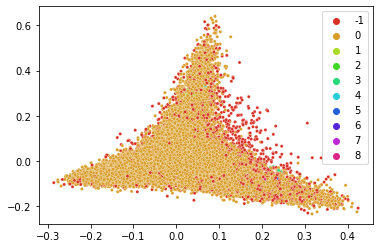

In [43]:
palette = sns.hls_palette(len(np.unique(clusters)), l=.5, s=.7)

sns.scatterplot(x=W_t[:, 0],
                y=W_t[:, 1],
                hue=clusters,
                palette=palette,
                s=10)